In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
postpartum_df = pd.read_csv("../Dataset/postpartum_processed.csv")

### Model building

In [20]:
x = postpartum_df.drop(['HADS_13'], axis=1)
y = postpartum_df['HADS_13']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5, stratify=y)

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76        57
         1.0       0.43      0.41      0.42        29
         2.0       0.43      0.50      0.46        12
         3.0       0.43      0.60      0.50         5

    accuracy                           0.61       103
   macro avg       0.52      0.56      0.53       103
weighted avg       0.62      0.61      0.62       103



Text(0.5, 1.0, 'Decision Tree -> Postpartum')

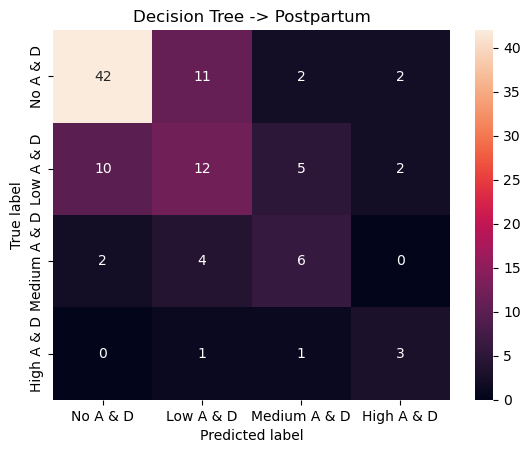

In [40]:
model = DecisionTreeClassifier(max_depth=26)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, xticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'], yticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Decision Tree -> Postpartum")

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77        57
         1.0       0.48      0.48      0.48        29
         2.0       0.60      0.75      0.67        12
         3.0       0.75      0.60      0.67         5

    accuracy                           0.67       103
   macro avg       0.65      0.65      0.65       103
weighted avg       0.67      0.67      0.67       103



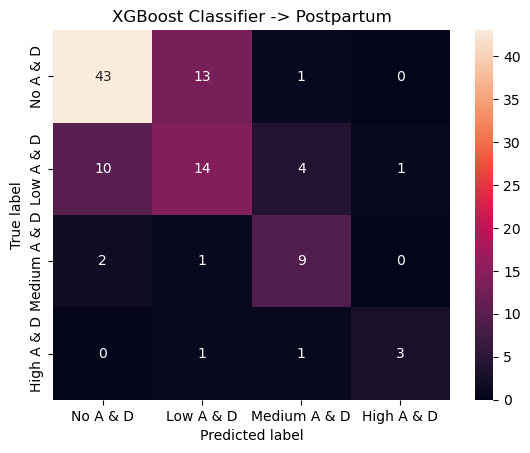

In [33]:
model = XGBClassifier(n_estimators=150, max_depth=20, eta=0.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, xticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'], yticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("XGBoost Classifier -> Postpartum")
plt.show()

              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79        57
         1.0       0.40      0.41      0.41        29
         2.0       0.43      0.25      0.32        12
         3.0       0.50      0.20      0.29         5

    accuracy                           0.62       103
   macro avg       0.52      0.43      0.45       103
weighted avg       0.60      0.62      0.60       103



Text(0.5, 1.0, 'Random Forest -> Postpartum')

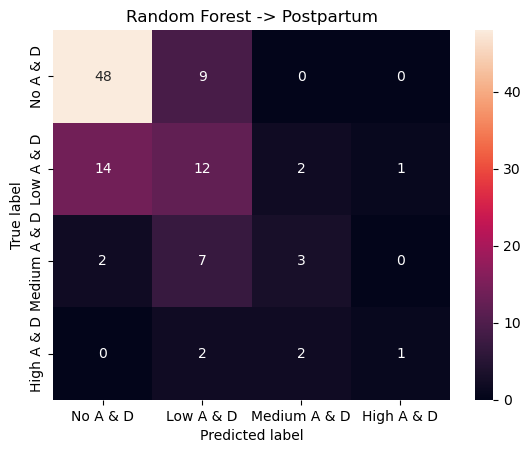

In [46]:
model = RandomForestClassifier(n_estimators=100, max_depth=30)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, xticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'], yticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Random Forest -> Postpartum")

              precision    recall  f1-score   support

         0.0       0.72      0.60      0.65        57
         1.0       0.31      0.38      0.34        29
         2.0       0.25      0.42      0.31        12
         3.0       0.00      0.00      0.00         5

    accuracy                           0.49       103
   macro avg       0.32      0.35      0.33       103
weighted avg       0.52      0.49      0.49       103



Text(0.5, 1.0, 'Support Vector Classifier -> Postpartum')

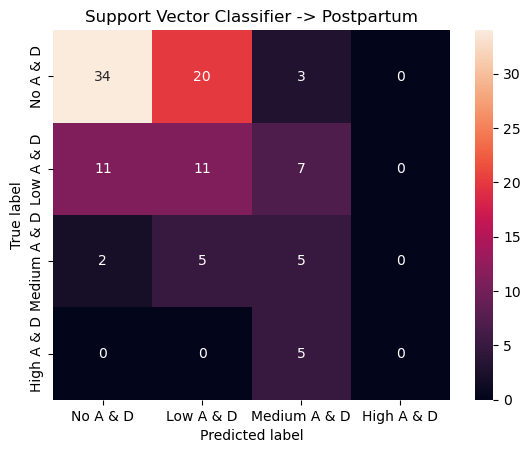

In [60]:
model = SVC(max_iter=30)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, xticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'], yticklabels=['No A & D', 'Low A & D', 'Medium A & D', 'High A & D'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Support Vector Classifier -> Postpartum")

### Parameter tuning and cross validation